### This script contains the following:
1. Import data and libraries
2. Data wrangling
3. Data cleaning
4. Plotting a choropleth

# 1. Import data and libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [3]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [4]:
# Import ".json" file for the Germany states. 

country_geo = r'/Users/krishngarg/Downloads/Data Analytics/Data immersion /Achievement_6/Advanced Analytics & Dashboard Design/germany-states.geojson'

In [5]:
#  JSON file contents here too:

f = open(r'/Users/krishngarg/Downloads/Data Analytics/Data immersion /Achievement_6/Advanced Analytics & Dashboard Design/germany-states.geojson')
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 0, 'properties': {'ID_0': 86, 'ISO': 'DEU', 'NAME_0': 'Germany', 'ID_1': 1, 'NAME_1': 'Baden-Württemberg', 'NL_NAME_1': None, 'VARNAME_1': None, 'TYPE_1': 'Land', 'ENGTYPE_1': 'State'}, 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[9.650460243225211, 49.7763404846192], [9.637469291687069, 49.69042205810558], [9.671889305114973, 49.683181762695426], [9.715788841247615, 49.724449157714844], [9.73471069335966, 49.683601379394645], [9.795839309692326, 49.72497940063482], [9.836868286132812, 49.69924926757807], [9.83308029174799, 49.65090179443382], [9.880538940429688, 49.60306167602539], [9.825579643249796, 49.550659179687614], [9.865819931030273, 49.53993988037121], [9.921249389648722, 49.58118057250982], [9.90511894226097, 49.5551109313966], [9.933589935302848, 49.55537033081055], [9.94201946258545, 49.47780990600609], [10.021670341491813, 49.47856903076166], [10.070828437805176, 49.54175186157238], [10.089150428772086, 49.504989624023665], [10.1290397

In [6]:
# Defining path
path = r'/Users/krishngarg/Downloads/Data Analytics/Data immersion /Achievement_6/Advanced Analytics & Dashboard Design'

In [7]:
#Importing Immoscount_datasets
df_rent = pd.read_excel(os.path.join(path,'ImmoScout24B.xlsx'))

In [8]:
df_rent.head()

,Regio 1,Service Charge,Heating Type,Telekom Tv Offer,Telekom Hybrid Upload Speed,Newly Const,Balcony,Picture count,Price trend,Telekom Upload Speed,...,Regio 2,Regio 3,Description,Facilities,Heating Costs,Energy Efficiency Class,Last Refurbish,Electricity Base Price,Electricity Kwh Price,Date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,2023-05-19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,2023-05-19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,2023-10-19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,2023-05-19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,2023-02-20


In [8]:
df_rent.shape

(268850, 49)

# 2. Data wrangling

### 1. dropping the column
#### there is no need to drop the colum

### 2. Renaming Column

In [9]:
df_rent.rename(columns = {'Total rent' : 'Average of Total rent'},inplace= True)
df_rent.rename(columns = {'Total rent' : 'Max of Total rent'}, inplace = True)

In [10]:
df_rent.head()

,Regio 1,Service Charge,Heating Type,Telekom Tv Offer,Telekom Hybrid Upload Speed,Newly Const,Balcony,Picture count,Price trend,Telekom Upload Speed,...,Regio 2,Regio 3,Description,Facilities,Heating Costs,Energy Efficiency Class,Last Refurbish,Electricity Base Price,Electricity Kwh Price,Date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,2023-05-19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,2023-05-19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,2023-10-19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,2023-05-19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,2023-02-20


### 3. Data type

In [11]:
df_rent.dtypes

Regio 1                                object
Service Charge                        float64
Heating Type                           object
Telekom Tv Offer                       object
Telekom Hybrid Upload Speed           float64
Newly Const                              bool
Balcony                                  bool
Picture count                           int64
Price trend                           float64
Telekom Upload Speed                  float64
Total Rent                            float64
Year Constructed                      float64
Scout ID                                int64
No Park Spaces                        float64
FiringTypes                            object
Has Kitchen                              bool
Geo_bln                                object
Cellar                                   bool
Year Constructed Range                float64
Base Rent                             float64
House Number                           object
Living Space                      

#### There is no need to change the data type.

# 3. Data Cleaning

###  Consistency Check

In [12]:
# Check for missing values

df_rent.isnull().sum()

Regio 1                             0
Service Charge                   6909
Heating Type                    44856
Telekom Tv Offer                32619
Telekom Hybrid Upload Speed    223830
Newly Const                         0
Balcony                             0
Picture count                       0
Price trend                      1832
Telekom Upload Speed            33358
Total Rent                      40517
Year Constructed                57045
Scout ID                            0
No Park Spaces                 175798
FiringTypes                     56964
Has Kitchen                         0
Geo_bln                             0
Cellar                              0
Year Constructed Range          57045
Base Rent                           0
House Number                    71018
Living Space                        0
Geo_krs                             0
Condition                       68489
Interior Qual                  112665
Pets Allowed                   114573
Street      

### Duplicate check

In [13]:
dups = df_rent.duplicated()

In [14]:
dups.shape

(268850,)

#### No duplicate value is found.

### Extreme values check

<Axes: xlabel='Price trend', ylabel='Count'>

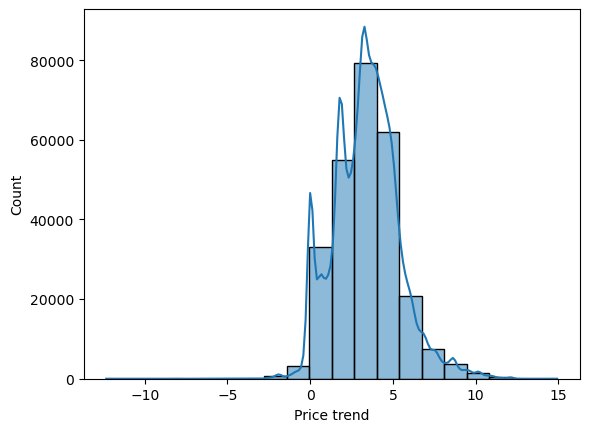

In [15]:
sns.histplot(df_rent['Price trend'], bins=20, kde = True) 

<Axes: xlabel='Year Constructed', ylabel='Count'>

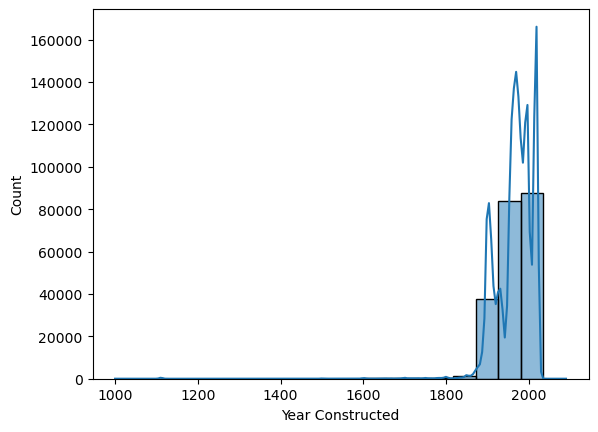

In [16]:
sns.histplot(df_rent['Year Constructed'], bins=20, kde = True)

No need to remove any extreme value

### 4. Plotting Choropleth

In [17]:
# Create a data frame with just the states and the values for rating we want plotted

data_to_plot = df_rent[['Regio 1','Total Rent']]
data_to_plot.head()

,Regio 1,Total Rent
0,Nordrhein_Westfalen,840.0
1,Rheinland_Pfalz,NaN
2,Sachsen,1300.0
3,Sachsen,NaN
4,Bremen,903.0


In [18]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['Regio 1', 'Total Rent'],
    key_on = 'feature.properties.NAME_1', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [19]:
map.save('plot_rentdata.html')

### Result

This Map shows us the Total rent rate in the States of Germany. We can see that Berlin, Baden-wurthemburg and Hamburg has the highest renting rates. This Map will help me in analysising in further research.

In [9]:
#export the Data
df_rent.to_csv(os.path.join('/Users/krishngarg/Downloads/Data Analytics/Data immersion ','sonal_spatial.csv'))